# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [3]:
import os
import re

In [4]:
import geopandas as gpd

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

datafile = pd.read_parquet('yellow_tripdata_2023-01.parquet')
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [7]:
# Listing out all files to be sampled. Files are available in the local folder
current_dir = os.getcwd()

#Getting the pattern of filename
pattern = re.compile(r'yellow_tripdata_2023-\d{2}\.parquet')

#Applying the pattern match (regex)
files_list = [file for file in os.listdir(current_dir) if pattern.match(file)]

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

#Creating a function for sampling the data
def sampling_5_percent_per_hour(data, sample_fraction=.05, date_col = 'tpep_pickup_datetime'):
    datafile = pd.read_parquet(data)
    
    #Extracting data and hour
    datafile['pickup_date'] = datafile[date_col].dt.date
    datafile['pickup_hour'] = datafile[date_col].dt.hour
    
    #Applying the fraction on the data set
    sampled_data = datafile.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x: x.sample(frac=sample_fraction, random_state=42))

    return sampled_data

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
#concatenating the file samples into a dataframe 
datafile_merged = pd.concat([sampling_5_percent_per_hour(i) for i in files_list],ignore_index=True) 

In [10]:
#Storing the value as csv in the local directory
# Store the df in csv/parquet
# df.to_csv('')
datafile_merged.to_csv('yellow_tripdata_2023.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
df = pd.read_csv('yellow_tripdata_2023.csv')

In [12]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
2         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
3         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
4         2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           0.49         1.0                  N           239           238   
2           0.75         1.0                  N            45           148   
3           2.90         1.0                  N           142           170   
4           2.50         1.0                  N            43           161   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             1  ...      0.5        1.88           0.0   
2             2  ...      0.5        0.00           0.0   
3             1  ...      0.5        4.80           0.0   
4             1  ...      0.5        7.25           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5          0.0   
1                    1.0         11.28                   2.5          0.0   
2                    1.0         12.90                   2.5          0.0   
3                    1.0         28.90                   2.5          0.0   
4                    1.0         36.25                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [13]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [14]:
#To fix the Index inconsistencies
df.reset_index(drop=True, inplace=True)

In [15]:
# Fix the index and drop any columns that are not needed
#store_and_fwd_flag seems to be not providing any details
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [16]:
# Combine the two airport fee columns
df['Airport_fee'].describe()


count    1.700557e+06
mean     1.421758e-01
std      4.757467e-01
min     -1.750000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64

In [17]:
#Checking for null values in the column before combining the columns
print('Count of Null values in Airport_fee' + '-' + str(df['Airport_fee'].isnull().sum()))
print('Count of Null Values in airport_fee' + '-' + str(df['airport_fee'].isnull().sum()))

Count of Null values in Airport_fee-214954
Count of Null Values in airport_fee-1765697


In [18]:
#Filling Null columns with 0 
df['Airport_fee'].fillna(0.0, inplace=True)
df['airport_fee'].fillna(0.0, inplace=True)

In [19]:
#Combining the 2 columns. Adding a new column to store the combined value
df['Airport_Total_Fee'] = df['Airport_fee'] + df['airport_fee']

In [20]:
#Dropping the 2 columns 
df.drop(['Airport_fee','airport_fee'], axis=1, inplace=True)

In [21]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
2         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
3         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
4         2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           0.49         1.0           239           238             1   
2           0.75         1.0            45           148             2   
3           2.90         1.0           142           170             1   
4           2.50         1.0            43           161             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          6.5    1.0      0.5        2.00           0.0   
1          4.4    1.0      0.5        1.88           0.0   
2          7.9    1.0      0.5        0.00           0.0   
3         19.1    3.5      0.5        4.80           0.0   
4         24.0    1.0      0.5        7.25           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         13.50                   2.5  2022-12-31   
1                    1.0         11.28                   2.5  2023-01-01   
2                    1.0         12.90                   2.5  2023-01-01   
3                    1.0         28.90                   2.5  2023-01-01   
4                    1.0         36.25                   2.5  2023-01-01   

   pickup_hour  Airport_Total_Fee  
0           23                0.0  
1            0                0.0  
2            0                0.0  
3            0                0.0  
4            0                0.0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [22]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52              2  2023-01-01 00:31:44   2023-01-01 00:51:27              2.0   
139             2  2023-01-01 00:11:23   2023-01-01 00:24:21              1.0   
171             2  2023-01-01 00:40:02   2023-01-01 01:07:56              1.0   
175             2  2023-01-01 00:33:21   2023-01-01 00:47:59              3.0   
219             2  2023-01-01 00:40:34   2023-01-01 01:01:20              1.0   
...           ...                  ...                   ...              ...   
1915325         2  2023-12-31 23:00:11   2023-12-31 23:14:14              NaN   
1915354         2  2023-12-31 23:21:30   2023-12-31 23:31:08              1.0   
1915426         2  2023-12-31 23:11:37   2023-12-31 23:33:26              2.0   
1915446         2  2023-12-31 23:26:05   2023-12-31 23:27:56              1.0   
1915508         2  2023-12-31 23:40:07   2023-12-31 23:41:11              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
52                5.21         1.0           186           144             4   
139               2.14         1.0           137           144             4   
171               9.90         1.0            90            67             4   
175               8.17         4.0           132           265             4   
219               3.86         1.0            50           162             4   
...                ...         ...           ...           ...           ...   
1915325           1.78         NaN           238           143             0   
1915354           0.76         1.0            68           186             4   
1915426           8.51         1.0           138            28             4   
1915446           0.57         1.0           263           141             4   
1915508           0.12         1.0           211           211             4   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
52             -26.1   -1.0     -0.5         0.0          0.00   
139            -14.2   -1.0     -0.5         0.0          0.00   
171            -43.6   -1.0     -0.5         0.0         -6.55   
175            -39.4   -1.0     -0.5         0.0          0.00   
219            -21.9   -1.0     -0.5         0.0          0.00   
...              ...    ...      ...         ...           ...   
1915325         -1.0    0.0      0.5         0.0          0.00   
1915354        -10.0   -1.0     -0.5         0.0          0.00   
1915426        -38.0   -6.0     -0.5         0.0          0.00   
1915446         -4.4   -1.0     -0.5         0.0          0.00   
1915508         -3.7   -1.0     -0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
52                        -1.0        -31.10                  -2.5   
139                       -1.0        -19.20                  -2.5   
171                       -1.0        -55.15                  -2.5   
175                       -1.0        -43.15                   0.0   
219                       -1.0        -26.90                  -2.5   
...                        ...           ...                   ...   
1915325                    1.0          3.00                   NaN   
1915354                   -1.0        -15.00                  -2.5   
1915426                   -1.0        -47.25                   0.0   
1915446                   -1.0         -9.40                  -2.5   
1915508                   -1.0         -8.70                  -2.5   

        pickup_date  pickup_hour  Airport_Total_Fee  
52       2023-01-01            0               0.00  
139      2023-01-01            0               0.00  
171      2023-01-01            0               0.00  
175      2023-01-01            0              -1.25  
219      2023-01-01            0               0.00  
...             ...          ...                ...  
1915325  2023-12-31           23               0.00  
1915354  

Did you notice something different in the `RatecodeID` column for above records?

In [23]:
# Analyse RatecodeID for the negative fare amounts
#For RatecodeID column There are few 'Na' values present for fare amount negative
df[df['fare_amount'] < 0].RatecodeID.value_counts(dropna=False)

RatecodeID
1.0    16721
2.0     1324
5.0      369
NaN      331
3.0      223
4.0       88
Name: count, dtype: int64

In [24]:
# Find which columns have negative values
Num_col = df.select_dtypes(include='number')
neg_col = (Num_col < 0).sum()/len(df) * 100
neg_col

VendorID                 0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.994826
extra                    0.494489
mta_tax                  0.952279
tip_amount               0.006108
tolls_amount             0.062803
improvement_surcharge    0.982975
total_amount             0.983550
congestion_surcharge     0.785743
pickup_hour              0.000000
Airport_Total_Fee        0.127172
dtype: float64

In [25]:
# fix these negative values
#Fare Amount, extra, tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Total_Fee
#These columns should not be negative, so this will be a data error, Since these rows are very less, we can either ignore or take the absolute value
#Our case we will take the absolute value for the rows having negative values

negative_col = ['fare_amount', 'extra','mta_tax', 'tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_Total_Fee']
for col in negative_col:
    df[col] = df[col].abs()

In [26]:
# Find which columns have negative values
Num_col = df.select_dtypes(include='number')
neg_col = (Num_col < 0).sum()/len(df) * 100
neg_col

VendorID                 0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pickup_hour              0.0
Airport_Total_Fee        0.0
dtype: float64

In [27]:
#Dropping Column pickup_date, not used
df.drop(columns='pickup_date', axis=1, inplace=True)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [28]:
# Find the proportion of missing values in each column
#There is no null value present in the data frame
null_counts = df.isnull().mean() * 100 
null_counts [null_counts > 0]

passenger_count         3.400659
RatecodeID              3.400659
congestion_surcharge    3.400659
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [29]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

#Getting the median value for the passenger count 
median = df['passenger_count'].median()

#Filling the NaN value with the median
df['passenger_count'] = df['passenger_count'].fillna(median)

#Converting the passenger_count column to Int datatype
df["passenger_count"] = df["passenger_count"].astype(int)

Did you find zeroes in passenger_count? Handle these.

In [30]:
df[df["passenger_count"]==0].passenger_count.count()

np.int64(29587)

In [31]:
#Replace the 0's value with median
df["passenger_count"].replace(0,median, inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [32]:
# Fix missing values in 'RatecodeID'
#There are around 3% Null values which we will replace with the median
#There are .5% of null values which are represented by 99, Since it is an accepted value in the dictionary will keep the same
df['RatecodeID'].value_counts(dropna=False,normalize=True)

RatecodeID
1.0     0.911404
2.0     0.038123
NaN     0.034007
5.0     0.005709
99.0    0.005420
3.0     0.003339
4.0     0.001996
6.0     0.000002
Name: proportion, dtype: float64

In [33]:
#Taking the median value for the RatecodeID
Ratecode_median = df['RatecodeID'].median()

#Fill the missing values with the median value
df['RatecodeID'].fillna(Ratecode_median,inplace=True)

#Changing the data type from float to Integer
df['RatecodeID'] = df['RatecodeID'].astype('int')

In [34]:
df['RatecodeID'].value_counts(dropna=False,normalize=True)

RatecodeID
1     0.945410
2     0.038123
5     0.005709
99    0.005420
3     0.003339
4     0.001996
6     0.000002
Name: proportion, dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [35]:
# handle null values in congestion_surcharge
#There are around 3.4% Null values which we will replace with the median
df['congestion_surcharge'].value_counts(dropna=False,normalize=True)

congestion_surcharge
2.5    0.890039
0.0    0.075954
NaN    0.034007
1.0    0.000001
Name: proportion, dtype: float64

In [36]:
#Taking the median value for the congestion_surcharge
congest_median = df['congestion_surcharge'].median()

#Fill the missing values with the median value
df['congestion_surcharge'].fillna(congest_median,inplace=True)

#Changing the data type from float to Integer
df['congestion_surcharge'] = df['congestion_surcharge'].astype('int')

In [37]:
df['congestion_surcharge'].value_counts(dropna=False,normalize=True)

congestion_surcharge
2    0.924045
0    0.075954
1    0.000001
Name: proportion, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [38]:
# Handle any remaining missing values
#All the missing values are fixed
null_counts = df.isnull().mean() * 100 
null_counts [null_counts > 0]


Series([], dtype: float64)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [39]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
#Keeping only the key columns and dropping the rest
numeric_cols = df.select_dtypes(include='number')
numeric_cols.drop(['VendorID','passenger_count','RatecodeID','payment_type'],axis=1, inplace=True)

<Figure size 1500x3250 with 0 Axes>

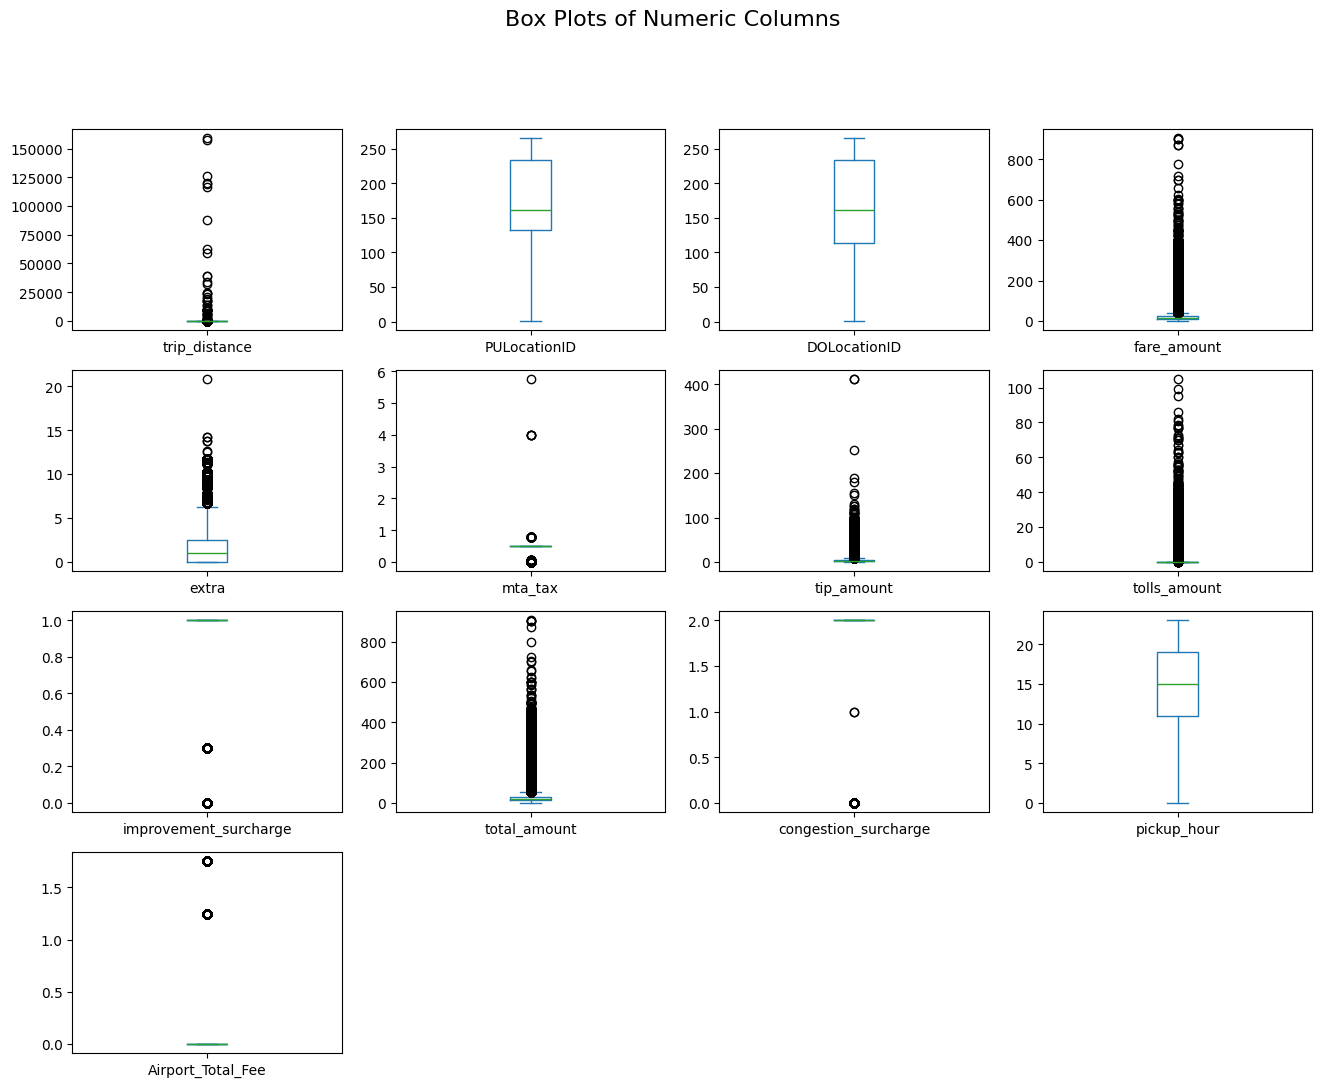

In [40]:
plt.figure(figsize=(15, len(numeric_cols.columns) * 2.5))
numeric_cols.plot(kind='box', subplots=True, layout=(4, 4), figsize=(16, 12), sharex=False, sharey=False)
plt.suptitle("Box Plots of Numeric Columns", fontsize=16)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [41]:
# remove passenger_count > 6
df = df[df['passenger_count']<=6]

In [42]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'Airport_Total_Fee'],
      dtype='object')

#### TRIP DISTANCE

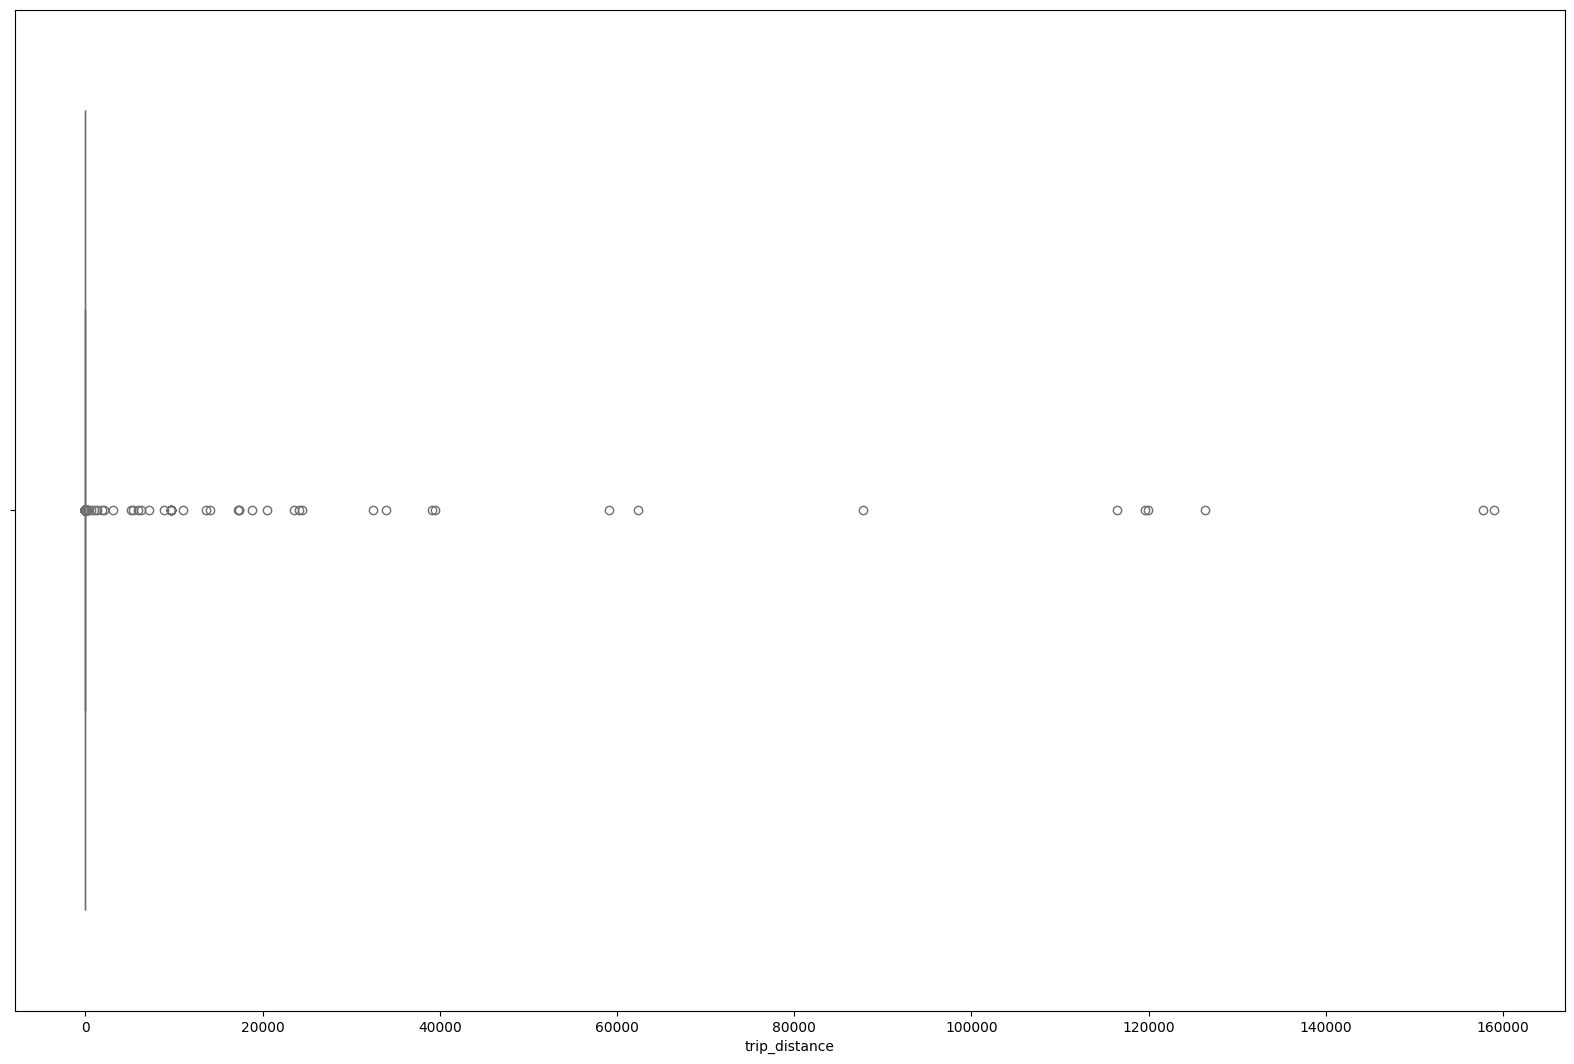

In [43]:
# Continue with outlier handling
plt.figure(figsize=(20,13))
sns.boxplot(data=df, x='trip_distance', color='skyblue')
plt.show()

In [44]:
#Entries where the trip distance is nearly zero and fare amount is greater than or equal to 300
suspicious_entries = df[(df['trip_distance'] < 1) & (df['fare_amount'] >= 300)]
suspicious_entries.count()

VendorID                 84
tpep_pickup_datetime     84
tpep_dropoff_datetime    84
passenger_count          84
trip_distance            84
RatecodeID               84
PULocationID             84
DOLocationID             84
payment_type             84
fare_amount              84
extra                    84
mta_tax                  84
tip_amount               84
tolls_amount             84
improvement_surcharge    84
total_amount             84
congestion_surcharge     84
pickup_hour              84
Airport_Total_Fee        84
dtype: int64

In [45]:
#Removing the above 75 rows from the data frame
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] >= 300))]

In [46]:
#Entries where 'trip_distance' and 'fare_amount' are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
invalid_trip_condition = ((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))
invalid_trip_condition.sum()

np.int64(75)

In [47]:
#Removing the invalid entry from the data
df = df[~invalid_trip_condition]

In [48]:
#Entries where 'trip_distance' is more than 250  miles.
long_trip_condition = df['trip_distance'] > 250
long_trip_condition.sum()

np.int64(46)

In [49]:
# Remove unrealistically long trips
df = df[~long_trip_condition]

#### Tip Count

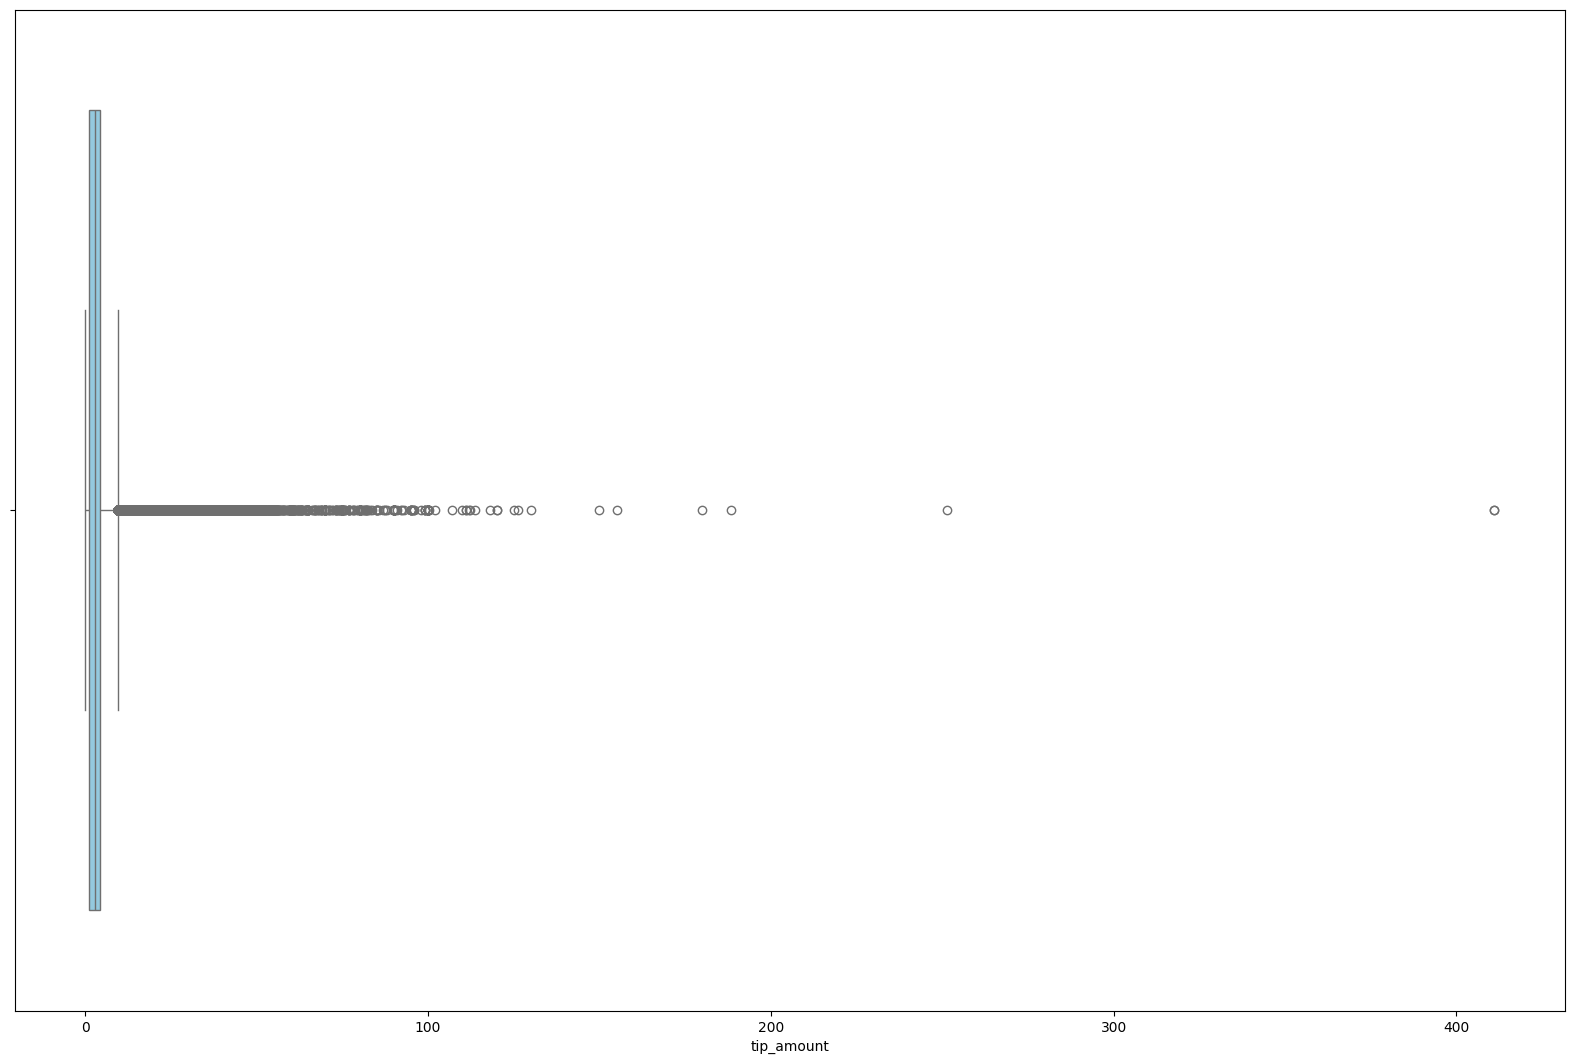

In [50]:
#Boxplot Visualization

plt.figure(figsize=(20,13))
sns.boxplot(data=df, x='tip_amount', color='skyblue')
plt.show()

In [51]:
#Entries where 'tip amount' is more than 100$.
high_tip_amount = df['tip_amount'] > 100
high_tip_amount.sum()

np.int64(22)

In [52]:
# Remove unrealistically high tip amount
df = df[~high_tip_amount]

#### Payment Type

In [53]:
#Entries where 'payment_type' is 0 (there is no payment_type 0 defined in the data dictionary)

Invalid_payment = df['payment_type'] == 0
Invalid_payment.sum()/len(df)

np.float64(0.03399571131187179)

In [54]:
#Since the Invalid payment type is less than 1% lets go and drop the rows
#Also payment type is a sensitive field, so impute may not be a good option
df = df[~Invalid_payment]

In [55]:
#convert pickup & drop datetime to datetime format 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Have a record which is from 2022 in the data and needs to be removed. 
previous_year_data = df['tpep_pickup_datetime'].dt.year < 2023
df = df[~previous_year_data]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [56]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'Airport_Total_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [57]:
numerical_columns = df.select_dtypes('number')
Categorical_columns = df.select_dtypes('object')

In [58]:
numerical_columns.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_hour',
       'Airport_Total_Fee'],
      dtype='object')

In [59]:
Categorical_columns.columns

Index([], dtype='object')

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [60]:
# Find and show the hourly trends in taxi pickups
#Need to group the count of trips and hours
hourly_trip_count = df['pickup_hour'].value_counts().sort_index(ascending=True)

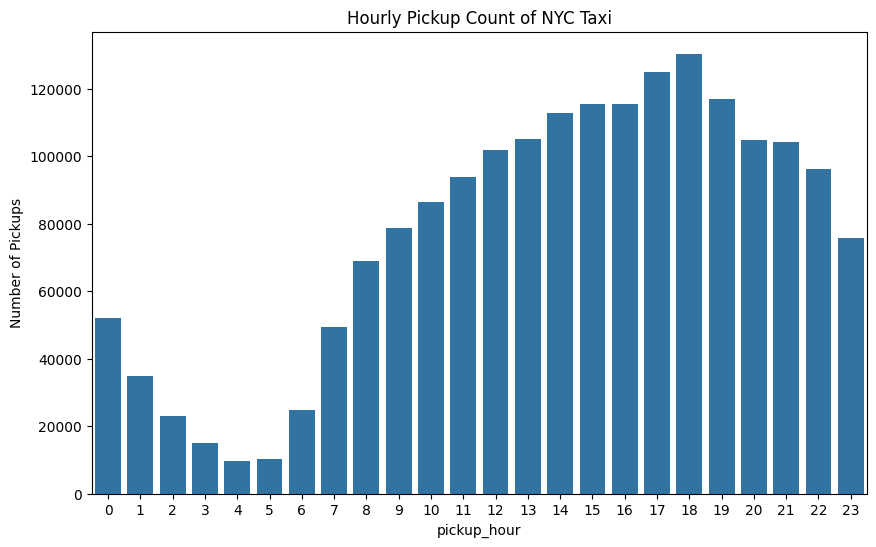

In [61]:
#Barplot representation for hourly pick up data 
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_trip_count.index,y=hourly_trip_count.values )
plt.title("Hourly Pickup Count of NYC Taxi")
plt.ylabel("Number of Pickups")
plt.show()

In [62]:
# Find and show the daily trends in taxi pickups (days of the week)

#Extract the hour from the datetime and add it to a new column
df['pickup_by_day'] = df['tpep_pickup_datetime'].dt.day_name()

#Need to count the pickup date 
pickup_by_day = df['pickup_by_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

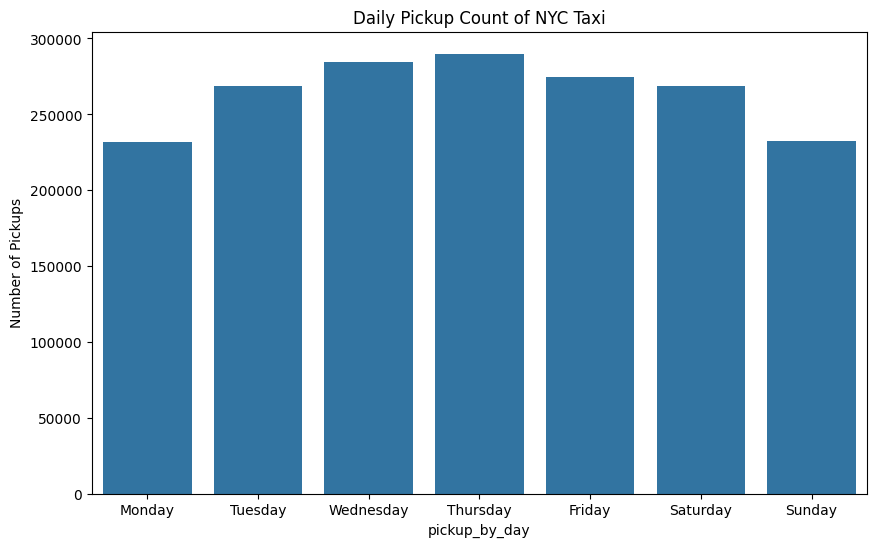

In [63]:
#Barplot representation for hourly pick up data 
plt.figure(figsize=(10,6))
sns.barplot(x=pickup_by_day.index,y=pickup_by_day.values )
plt.title("Daily Pickup Count of NYC Taxi")
plt.ylabel("Number of Pickups")
plt.show()

In [64]:
# Show the monthly trends in pickups
# Find and show the daily trends in taxi pickups (days of the week)

#Extract the hour from the datetime and add it to a new column
df['pickup_by_month'] = df['tpep_pickup_datetime'].dt.month_name()

#Need to count the pickup date 
pickup_by_month = df['pickup_by_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
)


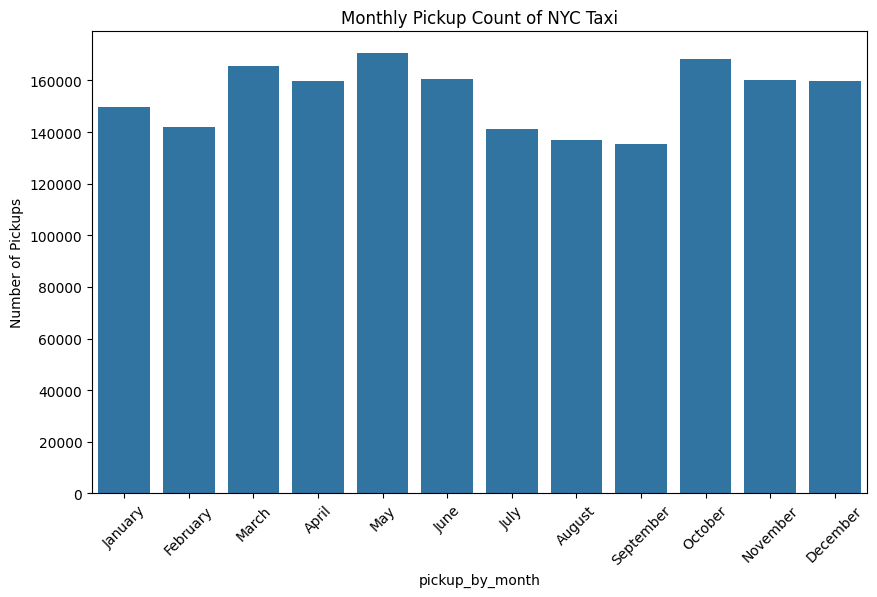

In [65]:
#Barplot representation for monthly pick up data 
plt.figure(figsize=(10,6))
sns.barplot(x=pickup_by_month.index,y=pickup_by_month.values )
plt.title("Monthly Pickup Count of NYC Taxi")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [66]:
# Analyse the above parameters
#There are values which are 0 for all 4 columns
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df[cols_to_check].describe()

fare_amount    tip_amount  total_amount  trip_distance
count  1.850159e+06  1.850159e+06  1.850159e+06   1.850159e+06
mean   1.974563e+01  3.537560e+00  2.882611e+01   3.439675e+00
std    1.830734e+01  4.027387e+00  2.289051e+01   4.555267e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.595000e+01   1.040000e+00
50%    1.350000e+01  2.800000e+00  2.100000e+01   1.770000e+00
75%    2.190000e+01  4.410000e+00  3.065000e+01   3.360000e+00
max    7.786000e+02  1.000000e+02  7.985500e+02   2.238100e+02

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [67]:
# Create a df with non zero entries for the selected parameters.
Non_zero_condition = (
                        (df['fare_amount'] > 0) & 
                        (df['tip_amount'] > 0) & 
                        (df['total_amount'] > 0) & 
                        (df['trip_distance'] > 0)
                        )
df_cleaned_data = df[Non_zero_condition].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [68]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_cleaned_data.groupby('pickup_by_month')['total_amount'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
)

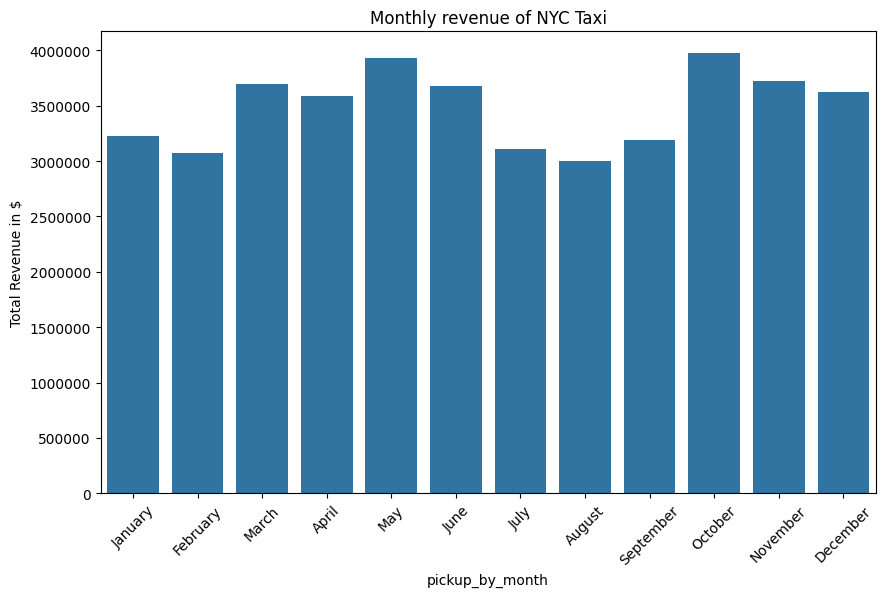

In [69]:
#Barplot representation for monthly revenue data 
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_revenue.index,y=monthly_revenue.values)
plt.title("Monthly revenue of NYC Taxi")
plt.ylabel("Total Revenue in $")
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [70]:
# Calculate proportion of each quarter
df_cleaned_data['quarter'] = df_cleaned_data['tpep_pickup_datetime'].dt.to_period('Q')
quarter_revenue = df_cleaned_data.groupby('quarter')['total_amount'].sum()

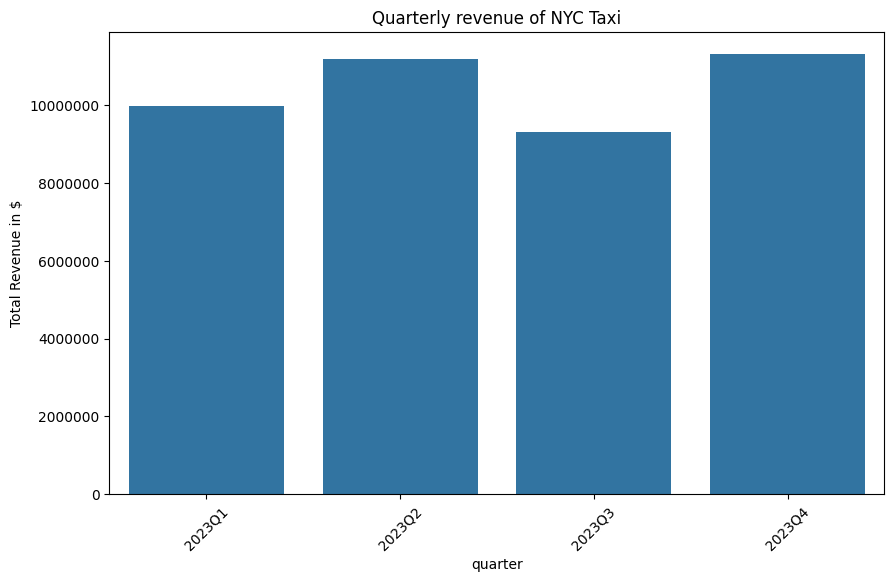

In [71]:
#Barplot representation for quarterly revenue data 
plt.figure(figsize=(10,6))
sns.barplot(x=quarter_revenue.index,y=quarter_revenue.values)
plt.title("Quarterly revenue of NYC Taxi")
plt.ylabel("Total Revenue in $")
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=45)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [72]:
# Show how trip fare is affected by distance
#Correlation value is .95 which shows highly correlated

condition = df_cleaned_data['trip_distance'] > 0

df_valid_distance = df_cleaned_data[condition]

correlation = df_valid_distance['trip_distance'].corr(df_valid_distance['fare_amount'])
correlation


np.float64(0.9514969778127043)

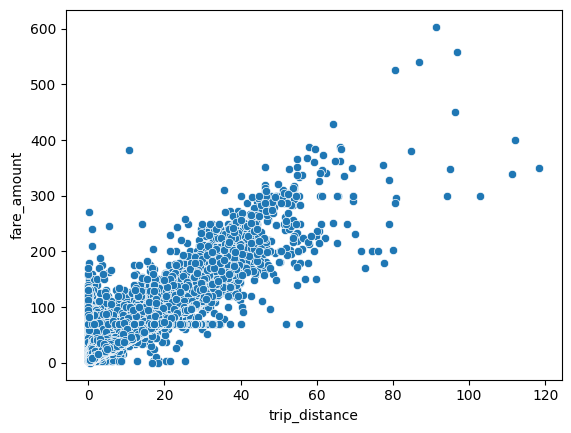

In [73]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_valid_distance)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [74]:
# Show relationship between fare and trip duration
df_valid_distance['trip_duration'] = (df_valid_distance['tpep_dropoff_datetime'] - df_valid_distance['tpep_pickup_datetime']).dt.total_seconds() / 60
correlation = df_valid_distance['fare_amount'].corr(df_valid_distance['trip_duration'] ) 
correlation

np.float64(0.3211870499294404)

In [75]:
#Fixing the anomalous behaviour
    #Duration > 300 minutes (5 hours) and Fare < $50
anomalous_data = ((df_valid_distance['trip_duration'] > 300) & (df_valid_distance['fare_amount']<50))
df_valid_distance = df_valid_distance[~anomalous_data]

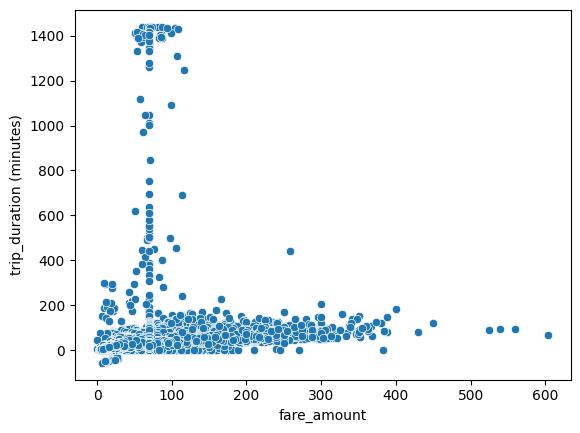

In [76]:
#Visualization using scatterplot

sns.scatterplot(x='fare_amount', y='trip_duration', data=df_valid_distance)
plt.ylabel('trip_duration (minutes)')
plt.show()

In [77]:
# Show relationship between fare and number of passengers
correlation = df_valid_distance['fare_amount'].corr(df_valid_distance['passenger_count'] ) 
correlation

np.float64(0.038203725182968766)

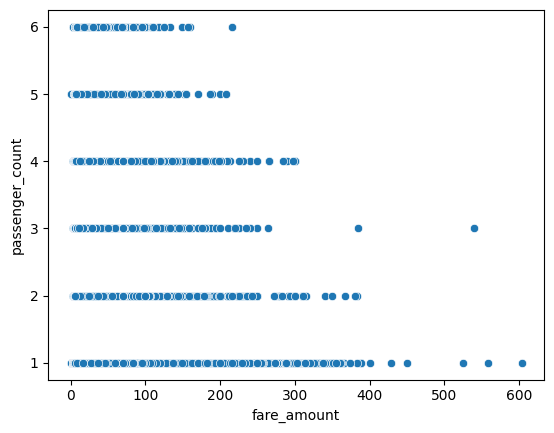

In [78]:
#Visualization using scatterplot

sns.scatterplot(x='fare_amount', y='passenger_count', data=df_valid_distance)
plt.show()

In [79]:
# Show relationship between tip amount and trip distance
correlation = df_valid_distance['tip_amount'].corr(df_valid_distance['trip_distance'] ) 
correlation

np.float64(0.8087112616915059)

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

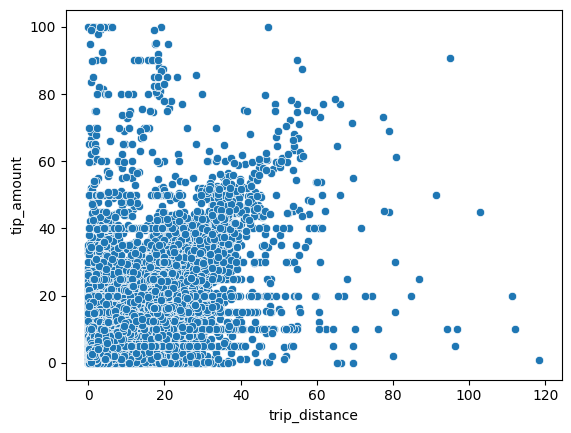

In [80]:
#Visualization using scatterplot

sns.scatterplot(x='trip_distance', y='tip_amount', data=df_valid_distance)
#Visualization using scatterplotplt.show()

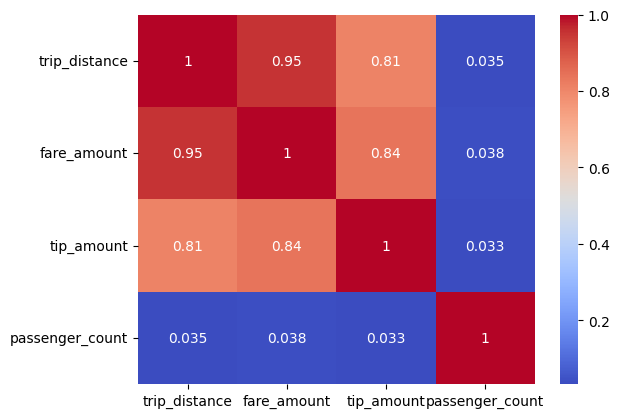

In [81]:
#Visualization using Heatmap

heatmap_data = df_valid_distance[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']]
sns.heatmap(data=heatmap_data.corr(), cmap='coolwarm',annot=True )
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [82]:
# Analyse the distribution of different payment types (payment_type).
#Converting to Categorical value will give more insight
payment_labels = {0:'Flex Fare trip',1:'Credit Card',2:'Cash',3:'No Charge',4:'Dispute',5:'Unknown',6:'Voided Trip'}
df_valid_distance['payment_labels'] = df['payment_type'].map(payment_labels)

In [83]:
# Most dominating is Credit Card - 99.9% of transactions happen through credit card
df_payment_data = df_valid_distance['payment_labels'].value_counts()
df_payment_data

payment_labels
Credit Card    1412561
Dispute            197
Cash                88
No Charge           23
Name: count, dtype: int64

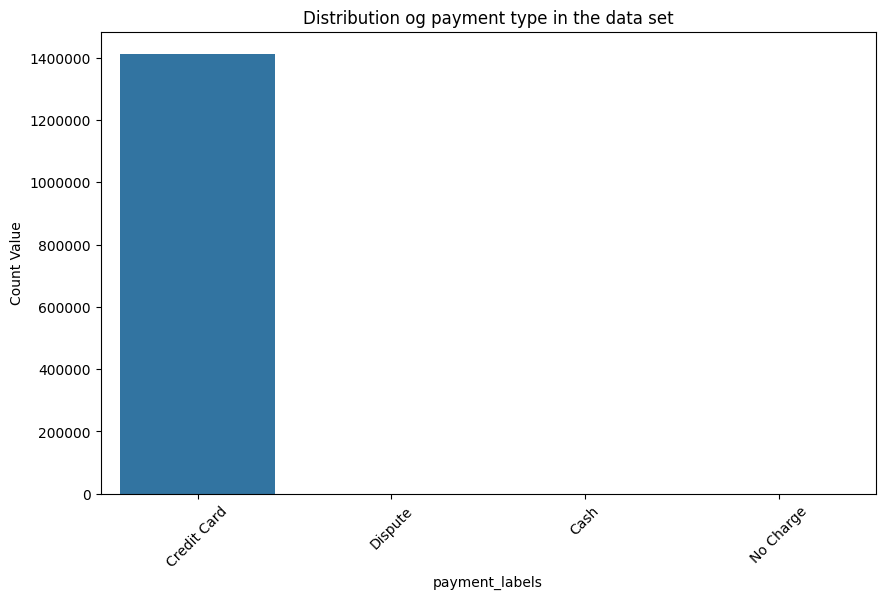

In [84]:
#Barplot representation for monthly revenue data 
plt.figure(figsize=(10,6))
sns.barplot(x=df_payment_data.index,y=df_payment_data.values)
plt.title("Distribution og payment type in the data set")
plt.ylabel("Count Value")
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=45)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [85]:
# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


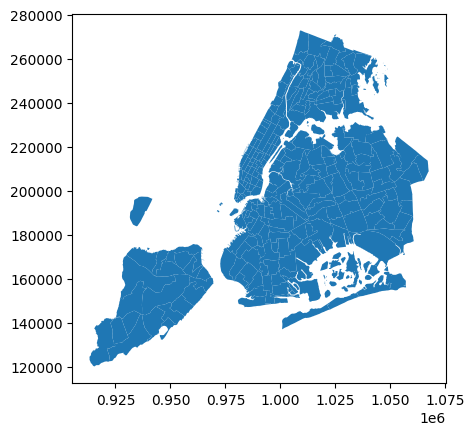

In [86]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [87]:
#Copying the original data frame

df_zones = zones.copy()
df_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [88]:
df_zones = df_zones.rename(columns={'LocationID':'PULocationID'})
df_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [89]:
# Merge zones and trip records using locationID and PULocationID
df_merge_zones = df_valid_distance.merge(df_zones,on='PULocationID',how='left')
df_merge_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:10:30   2023-01-01 00:11:49                1   
1         1  2023-01-01 00:47:17   2023-01-01 01:07:01                2   
2         2  2023-01-01 00:06:02   2023-01-01 00:31:38                1   
3         2  2023-01-01 00:02:19   2023-01-01 00:30:49                1   
4         2  2023-01-01 00:13:54   2023-01-01 00:21:26                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.49           1           239           238             1   
1           2.90           1           142           170             1   
2           2.50           1            43           161             1   
3          20.37           2           132           140             1   
4           2.03           1           142            75             1   

   fare_amount  ...  pickup_by_month  quarter  trip_duration  payment_labels  \
0          4.4  ...          January   2023Q1       1.316667     Credit Card   
1         19.1  ...          January   2023Q1      19.733333     Credit Card   
2         24.0  ...          January   2023Q1      25.600000     Credit Card   
3         70.0  ...          January   2023Q1      28.500000     Credit Card   
4         10.7  ...          January   2023Q1       7.533333     Credit Card   

   OBJECTID  Shape_Leng  Shape_Area                   zone    borough  \
0     239.0    0.063626    0.000205  Upper West Side South  Manhattan   
1     142.0    0.038176    0.000076    Lincoln Square East  Manhattan   
2      43.0    0.099739    0.000380           Central Park  Manhattan   
3     132.0    0.245479    0.002038            JFK Airport     Queens   
4     142.0    0.038176    0.000076    Lincoln Square East  Manhattan   

                                            geometry  
0  POLYGON ((991168.979 226252.992, 991955.565 22...  
1  POLYGON ((989380.305 218980.247, 989359.803 21...  
2  POLYGON ((991852.973 217950.807, 991725.244 21...  
3  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
4  POLYGON ((989380.305 218980.247, 989359.803 21...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [90]:
# Group data by location and calculate the number of trips
pickup_counts = df_merge_zones['PULocationID'].value_counts().reset_index(name='total_trips').sort_values(by='PULocationID')
pickup_counts

PULocationID  total_trips
104             1           37
214             3            1
56              4         1401
176             6            2
74              7          272
..            ...          ...
45            261         6746
31            262        19520
23            263        27632
38            264        12264
79            265          161

[223 rows x 2 columns]

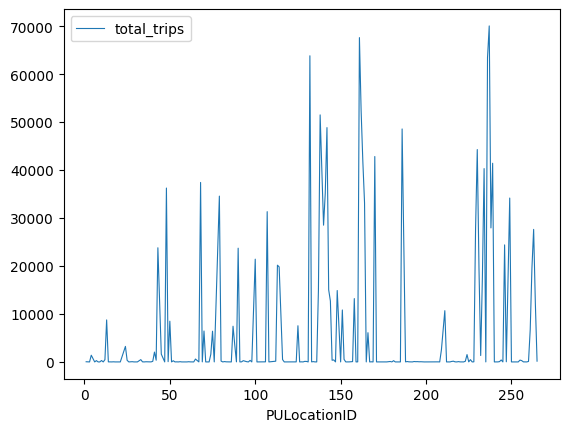

In [91]:
#Visualization using Line plot
pickup_counts.plot.line(x='PULocationID', y='total_trips',linewidth=0.8)
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [92]:
# Merge trip counts back to the zones GeoDataFrame
df_zones_count = df_zones.merge(pickup_counts, on='PULocationID', how='left')
df_zones_count.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_trips  
0         37.0  
1          NaN  
2          1.0  
3       1401.0  
4          NaN

In [93]:
#Checking for NUll Values in the data frame
df_zones_count.isnull().sum()

OBJECTID         0
Shape_Leng       0
Shape_Area       0
zone             0
PULocationID     0
borough          0
geometry         0
total_trips     42
dtype: int64

In [94]:
#Removing the Nan values to 0 for some records for better visibility
df_zones_count['total_trips'].fillna(0,inplace=True)

In [95]:
#Verifying for NUll Values in the data frame

df_zones_count.isnull().sum()

OBJECTID        0
Shape_Leng      0
Shape_Area      0
zone            0
PULocationID    0
borough         0
geometry        0
total_trips     0
dtype: int64

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1200x1000 with 0 Axes>

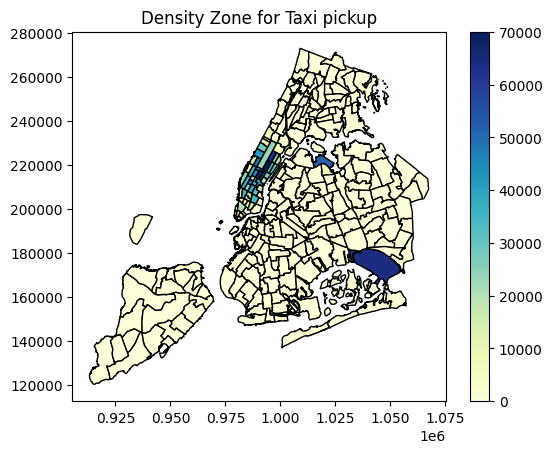

In [96]:
# Define figure and axis
plt.figure(figsize=(12, 10))

# Plot the map and display it
df_zones_count.plot(column='total_trips', cmap='YlGnBu', legend=True, edgecolor='black')
plt.title('Density Zone for Taxi pickup')
plt.show()


In [97]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = df_zones_count.sort_values(by='total_trips', ascending=False)
sorted_zones[['zone','total_trips']].head(10) #First 100 trip zones


zone  total_trips
236         Upper East Side South      70053.0
160                Midtown Center      67616.0
131                   JFK Airport      63827.0
235         Upper East Side North      63453.0
161                  Midtown East      52353.0
137             LaGuardia Airport      51505.0
141           Lincoln Square East      48853.0
185  Penn Station/Madison Sq West      48571.0
229     Times Sq/Theatre District      44278.0
169                   Murray Hill      42824.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [98]:
# Find routes which have the slowest speeds at different times of the day
#Converting the duration from minutes to hours
df_merge_zones['trip_duration'] = df_merge_zones['trip_duration']/60

In [99]:
# Filter out invalid or zero-duration trips
df_cleaned_data = df_merge_zones[(df_merge_zones['trip_duration'] > 0) & (df_merge_zones['trip_distance'] > 0)]
df_cleaned_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'Airport_Total_Fee',
       'pickup_by_day', 'pickup_by_month', 'quarter', 'trip_duration',
       'payment_labels', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry'],
      dtype='object')

In [100]:
#Finding the speed by diving Trip distance with duration
df_cleaned_data['avg_speed_mph'] = df_cleaned_data['trip_distance']/df_cleaned_data['trip_duration'] 

#Getting the slowest speed for each hour
grouped_data = df_cleaned_data.groupby(['pickup_hour','PULocationID','zone','DOLocationID'])['avg_speed_mph'].mean().reset_index()

#Slowest route for each hour
grouped_data.loc[grouped_data.groupby('pickup_hour')['avg_speed_mph'].idxmin()].sort_values('avg_speed_mph').head(10)

pickup_hour  PULocationID                           zone  DOLocationID  \
24068            7           216               South Ozone Park           216   
84361           20           193        Queensbridge/Ravenswood           193   
37255           11             1                 Newark Airport           264   
78615           19           163                  Midtown North            89   
36018           10           193        Queensbridge/Ravenswood           193   
58912           15           186   Penn Station/Madison Sq West            67   
7054             1           158  Meatpacking/West Village West           225   
51686           14            70                  East Elmhurst           195   
46549           13            43                   Central Park            16   
96816           22           260                       Woodside           129   

       avg_speed_mph  
24068       0.022234  
84361       0.033803  
37255       0.087167  
78615       0.110633  
36018       0.439024  
58912       0.478217  
7054        0.489954  
51686       0.568730  
46549       0.732359  
96816       0.786690

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

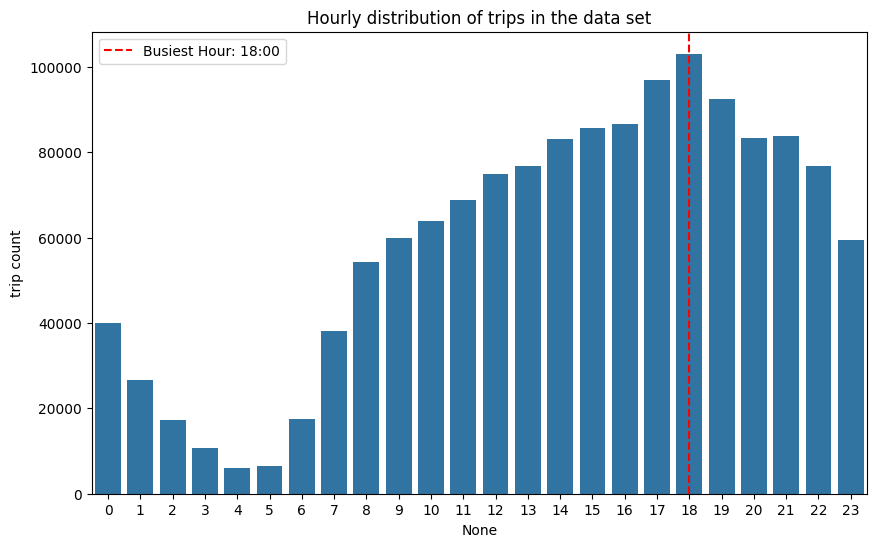

In [101]:
# Visualise the number of trips per hour and find the busiest hour
trip_hourly_data = df_cleaned_data.groupby('pickup_hour').size().reset_index(name='trip_count')
busiest_hour = trip_hourly_data['trip_count'].idxmax()

#Barplot representation for hourly trip distribution
plt.figure(figsize=(10,6))
sns.barplot(x=trip_hourly_data.index,y=trip_hourly_data['trip_count'])
plt.title("Hourly distribution of trips in the data set")
plt.ylabel("trip count")
plt.ticklabel_format(style='plain', axis='y') 

plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.legend()

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [102]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = .005

trip_hourly_data['actual_trip_count']  = trip_hourly_data['trip_count'] * (1/sample_fraction)

# Find the Top five busiest hours in the data
top5_busiest_hour = trip_hourly_data.nlargest(5,columns='trip_count')
top5_busiest_hour


pickup_hour  trip_count  actual_trip_count
18           18      103091         20618200.0
17           17       97046         19409200.0
19           19       92538         18507600.0
16           16       86677         17335400.0
15           15       85583         17116600.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [103]:
# Compare traffic trends for the week days and weekends
#Creating a column for specifying weekend and weekdays from the day name
df_cleaned_data['day_type'] = df_cleaned_data['pickup_by_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

#Grouping the day type and pickup hour and geeting the count of trips 
hourly_counts = df_cleaned_data.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')

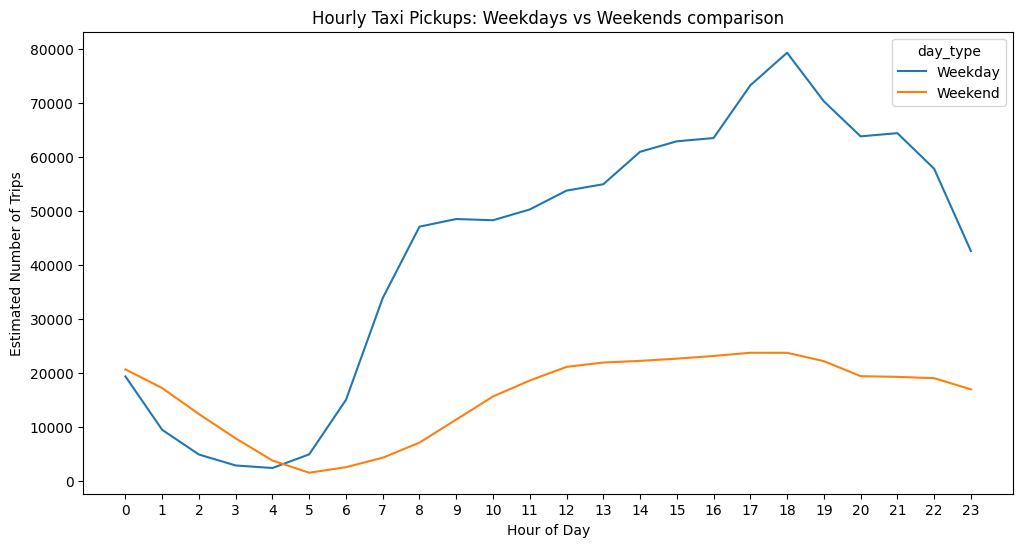

In [104]:
#plotting a line plot to show the hourly distribution of trip during week end and week day
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_counts,x='pickup_hour', y='trip_count', hue='day_type',markers='o')
plt.xticks(range(0, 24))
plt.title('Hourly Taxi Pickups: Weekdays vs Weekends comparison')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

## Weekday Trends

- There’s a sharp increase from **6 AM to 9 AM** (commute hours).
- The busiest period is **5 PM to 7 PM**, likely due to evening commute.
- Activity remains high until around **9 PM** and then drops sharply.

## Weekend Trends

- Weekends show a more gradual increase throughout the day.
- No sharp morning peak—people start moving around **10 AM to 11 AM**.
- Evening hours **3 PM to 7 PM** are busiest but still very low compared to weekdays.

## Night Hours (12 AM – 5 AM)

- Both weekday and weekend activity is low during these hours.
- Weekends have slightly more trips—possible for mid-night.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [105]:
# Find top 10 pickup and dropoff zones

df_cleaned_data['dropoff_hour'] = df_cleaned_data['tpep_dropoff_datetime'].dt.hour

#Count number of pickups per (zone, hour)
pickup_zones = df_cleaned_data.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

#Aggregate by zone to get total pickups
top10pickup_zones_list = pickup_zones.groupby('PULocationID')['pickup_count'].sum().reset_index(name='pickup_count').sort_values(by='pickup_count',ascending=False).head(10)['PULocationID'].values.tolist()

#Count number of dropoff per (zone, hour)
dropoff_zones = df_cleaned_data.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='dropoff_count')

#Aggregate by zone to get total pickups
top10dropoff_zone_list = dropoff_zones.groupby('DOLocationID')['dropoff_count'].sum().reset_index(name='dropoff_count').sort_values(by='dropoff_count',ascending=False).head(10)['DOLocationID'].values.tolist()

In [106]:
#Hourly pickup volume for the top 10 zones
pickup_trends = df_cleaned_data[df_cleaned_data['PULocationID'].isin(top10pickup_zones_list)].groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
#Hourly dropoff volume for the top 10 zones
dropoff_trends = df_cleaned_data[df_cleaned_data['DOLocationID'].isin(top10dropoff_zone_list)].groupby(['DOLocationID','dropoff_hour']).size().reset_index(name='dropoff_count')

In [107]:
pickup_trends.head()

PULocationID  pickup_hour  pickup_count
0           132            0          2664
1           132            1          1198
2           132            2           379
3           132            3           207
4           132            4           210

In [108]:
dropoff_trends.head()

DOLocationID  dropoff_hour  dropoff_count
0            68             0           1159
1            68             1            776
2            68             2            516
3            68             3            366
4            68             4            213

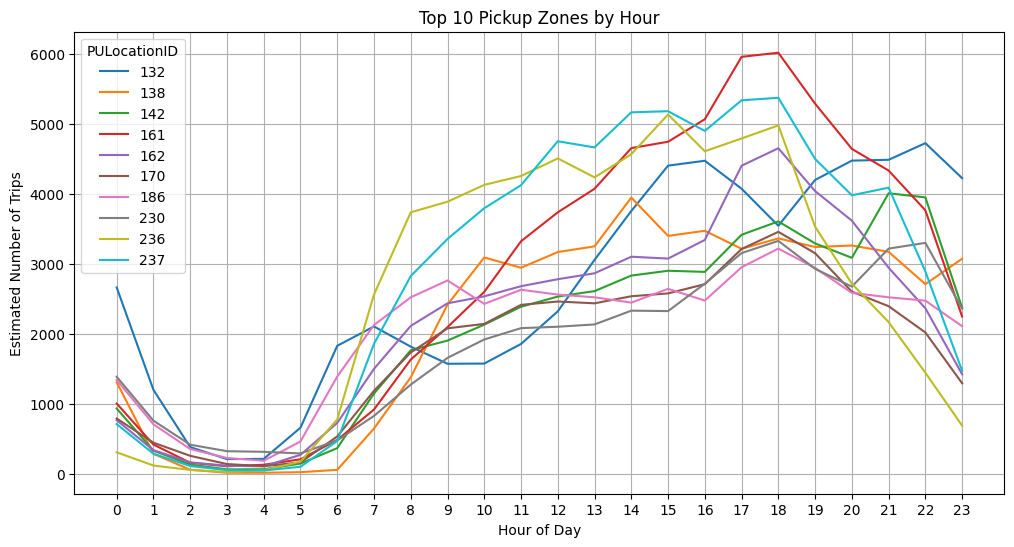

In [109]:
#Plot pickup trend
plt.figure(figsize=(12, 6))

# Plot each PULocationID individually to ensure full legend entries
for puloc in pickup_trends['PULocationID'].unique():
    data = pickup_trends[pickup_trends['PULocationID'] == puloc]
    plt.plot(data['pickup_hour'], data['pickup_count'], label=str(puloc))

plt.xticks(range(0, 24))
plt.title('Top 10 Pickup Zones by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.legend(title="PULocationID")
plt.grid(True)
plt.show()


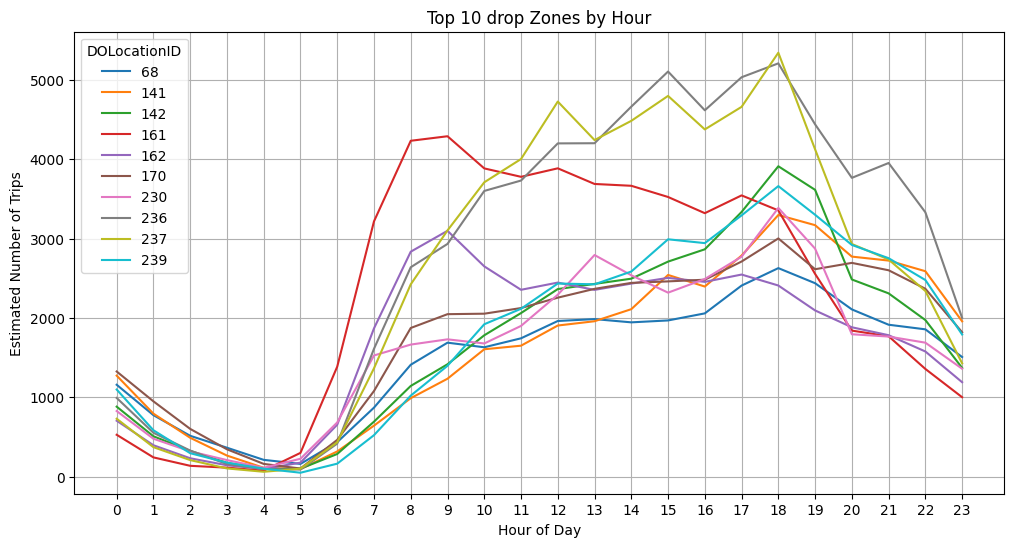

In [110]:
#Plot dropoff trend
plt.figure(figsize=(12, 6))

# Plot each DOLocationID individually to ensure full legend entries
for doloc in dropoff_trends['DOLocationID'].unique():
    data = dropoff_trends[dropoff_trends['DOLocationID'] == doloc]
    plt.plot(data['dropoff_hour'], data['dropoff_count'], label=str(doloc))
plt.xticks(range(0, 24))
plt.title('Top 10 drop Zones by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.legend(title="DOLocationID")
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [111]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_cleaned_data['PULocationID'].value_counts().reset_index(name='pickup_count')
dropoff_counts = df_cleaned_data['DOLocationID'].value_counts().reset_index(name='dropoff_count')

pickup_counts.rename(columns={'PULocationID':'LocationID'},inplace=True)
dropoff_counts.rename(columns={'DOLocationID':'LocationID'},inplace=True)

location_ratio = pd.merge(pickup_counts,dropoff_counts,on='LocationID',how='outer').fillna(0)

location_ratio['pickup_dropoff_ratio'] = location_ratio['pickup_count']/location_ratio['dropoff_count'].replace(0,np.nan)

In [112]:
#Dropping NA & infinity for better data visibility
location_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
location_ratio.dropna(subset=['pickup_dropoff_ratio'], inplace=True)

In [113]:
top10pickup_dropoff_ratio = location_ratio.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
top10pickup_dropoff_ratio

LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
69           70        6449.0          470.0             13.721277
126         132       63827.0        13583.0              4.699036
132         138       51505.0        17696.0              2.910545
180         186       48569.0        29451.0              1.649146
108         114       19804.0        14234.0              1.391317
42           43       23800.0        17328.0              1.373500
243         249       34164.0        25643.0              1.332293
156         162       52352.0        40899.0              1.280031
98          100       21423.0        17642.0              1.214318
155         161       67615.0        55698.0              1.213957

In [114]:
bottom10pickup_dropoff_ratio = location_ratio.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
bottom10pickup_dropoff_ratio

LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
1             2           0.0            1.0                   0.0
21           22           0.0          128.0                   0.0
22           23           0.0           24.0                   0.0
26           27           0.0           17.0                   0.0
29           30           0.0            5.0                   0.0
31           32           0.0           28.0                   0.0
242         248           0.0           32.0                   0.0
45           46           0.0           19.0                   0.0
58           59           0.0            8.0                   0.0
57           58           0.0           23.0                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [115]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter the dataset to extract all trips that occurred during night hours (11 PM to 5 AM)
# Separate DataFrames are created for:
# - Trips picked up during night hours (`night_zone_pickup_df`)
# - Trips dropped off during night hours (`night_zone_dropoff_df`)
night_zone_pickup_df =df_cleaned_data[(df_cleaned_data['pickup_hour'] >= 23) | (df_cleaned_data['pickup_hour'] <= 5)]
night_zone_dropoff_df = df_cleaned_data[(df_cleaned_data['dropoff_hour'] >= 23) | (df_cleaned_data['dropoff_hour'] <= 5)]

# Calculate the number of night-time pickups and dropoffs for each zone
# - Group by PULocationID to get total pickups between 11 PM and 5 AM
# - Group by DOLocationID to get total dropoffs during the same night-time window
night_pickup_count = night_zone_pickup_df.groupby(['PULocationID']).size().reset_index(name='pickup_count')
night_dropoff_count = night_zone_dropoff_df.groupby(['DOLocationID']).size().reset_index(name='dropoff_count')

In [116]:
# Identify the top 10 pickup zones during night hours based on trip count
# Merge with 'df_zones' to include zone names and borough information
# Rename the 'zone' column to 'pickup_zone' for clarity
top10_night_pickup_count = night_pickup_count.sort_values(by='pickup_count', ascending=False).head(10)
top10_night_pickup_count_zone = top10_night_pickup_count.merge(df_zones[['PULocationID', 'zone','borough']], on='PULocationID', how='left').rename(columns={'zone': 'pickup_zone'})
top10_night_pickup_count_zone

PULocationID  pickup_count                   pickup_zone    borough
0            79         12827                  East Village  Manhattan
1           249         10552                  West Village  Manhattan
2           132          9541                   JFK Airport     Queens
3           148          7973               Lower East Side  Manhattan
4            48          7953                  Clinton East  Manhattan
5           114          7329       Greenwich Village South  Manhattan
6           230          5833     Times Sq/Theatre District  Manhattan
7           186          5369  Penn Station/Madison Sq West  Manhattan
8           164          4846                 Midtown South  Manhattan
9           138          4762             LaGuardia Airport     Queens

In [117]:
# Identify the top 10 dropoff zones during night hours based on trip count
# Merge with zone reference ('df_zones') to retrieve zone names and boroughs
# Match on 'DOLocationID' and rename 'zone' to 'pickup_zone' for consistency in naming convention
# #Dropping the PULocationID to avoid confusion, That is the LocationID in df_zones data frame
top10_night_dropoff_count = night_dropoff_count.sort_values(by='dropoff_count', ascending=False).head(10)
top10_night_dropoff_count_zone   = top10_night_dropoff_count.merge(df_zones[['PULocationID', 'zone','borough']],left_on='DOLocationID', right_on='PULocationID', how='left').rename(columns={'zone': 'dropoff_zone'})
top10_night_dropoff_count_zone.drop(columns='PULocationID', inplace=True)
top10_night_dropoff_count_zone

DOLocationID  dropoff_count           dropoff_zone    borough
0            79           7232           East Village  Manhattan
1            48           5696           Clinton East  Manhattan
2           170           5311            Murray Hill  Manhattan
3           107           5148               Gramercy  Manhattan
4           141           4995        Lenox Hill West  Manhattan
5           263           4778         Yorkville West  Manhattan
6            68           4700           East Chelsea  Manhattan
7           249           4517           West Village  Manhattan
8           236           4227  Upper East Side North  Manhattan
9           239           4105  Upper West Side South  Manhattan

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [118]:
# Filter for night hours (11 PM to 5 AM)
# Split the dataset into night-time and day-time trips based on pickup hour
# - Night: 11 PM to 5 AM
# - Day: 6 AM to 10 PM
night_zone_df = df_cleaned_data[(df_cleaned_data['pickup_hour'] >= 23) | (df_cleaned_data['pickup_hour'] <= 5)]
day_zone_df = df_cleaned_data[(df_cleaned_data['pickup_hour'] >= 6) & (df_cleaned_data['pickup_hour'] <= 22)]

# Calculate total revenue for all trips, night-time trips, and day-time trips
total_revenue = df_cleaned_data['total_amount'].sum()
night_revenue = night_zone_df['total_amount'].sum()
day_revenue = day_zone_df['total_amount'].sum()

In [119]:
# Calculate the percentage share of total revenue contributed by night-time and day-time trips
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

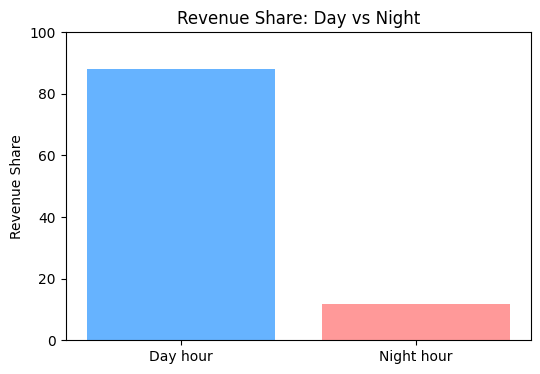

In [120]:
#Visualize using Bar chart
plt.figure(figsize=(6, 4))
plt.bar(x= ['Day hour','Night hour'], height=[day_share,night_share],color=['#66b3ff', '#ff9999'] )
plt.ylabel('Revenue Share')
plt.title('Revenue Share: Day vs Night')
plt.ylim(0, 100)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [121]:
# fare_per_mile: Total fare amount divided by trip distance to understand fare rate per mile
# fare_per_mile_per_passenger: Normalized fare rate per mile, adjusted for the number of passengers

df_cleaned_data['fare_per_mile'] = df_cleaned_data['fare_amount'] / df_cleaned_data['trip_distance'] 
df_cleaned_data['fare_per_mile_per_passenger'] = df_cleaned_data['fare_per_mile']/df_cleaned_data['passenger_count']

In [122]:
# Average fare per mile per passenger for each passenger count

avg_fare_per_mile_per_passenger = df_cleaned_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
avg_fare_per_mile_per_passenger

passenger_count  fare_per_mile_per_passenger
0                1                     9.190655
1                2                     5.278636
2                3                     3.491011
3                4                     4.235218
4                5                     1.535801
5                6                     1.366131

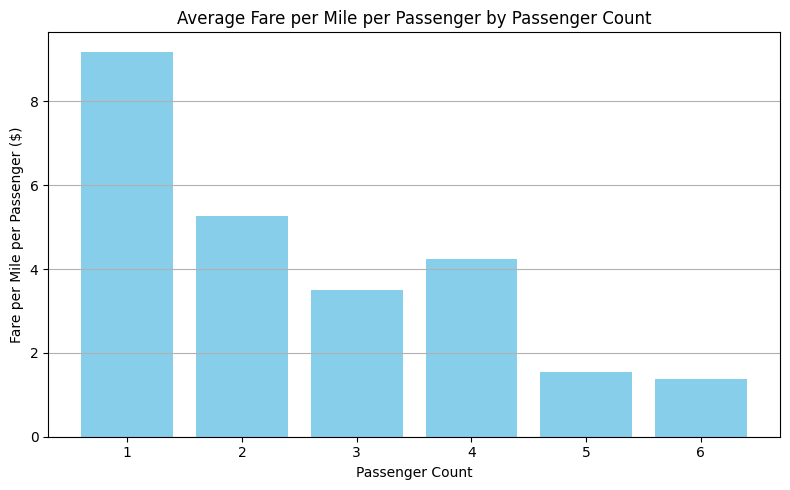

In [123]:
#Visual Representation using bar chart

plt.figure(figsize=(8, 5))
plt.bar(avg_fare_per_mile_per_passenger['passenger_count'], avg_fare_per_mile_per_passenger['fare_per_mile_per_passenger'], color='skyblue')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [124]:
#Additional Changes 
#Dropping the unwanted columns
df_cleaned_data.drop(columns='fare_per_mile_per_passenger', axis=1, inplace=True)

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [125]:
# Compare the average fare per mile for different days
avg_fare_per_mile_day = df_cleaned_data.groupby('pickup_by_day')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index(name='avg_fare_per_mile')

# Compare the average fare per mile for different times of the day
avg_fare_per_mile_hour = df_cleaned_data.groupby('pickup_hour')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

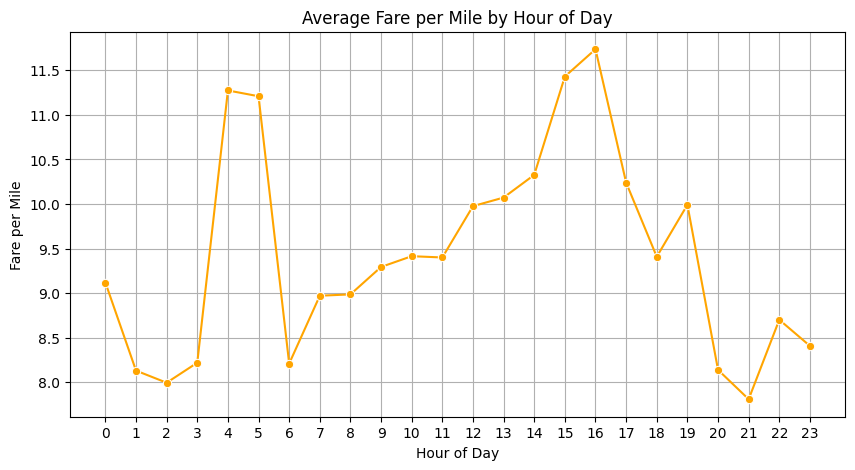

In [126]:
# Line Plot by different times of the day
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_mile_hour, x='pickup_hour', y='avg_fare_per_mile', marker='o', color='orange')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

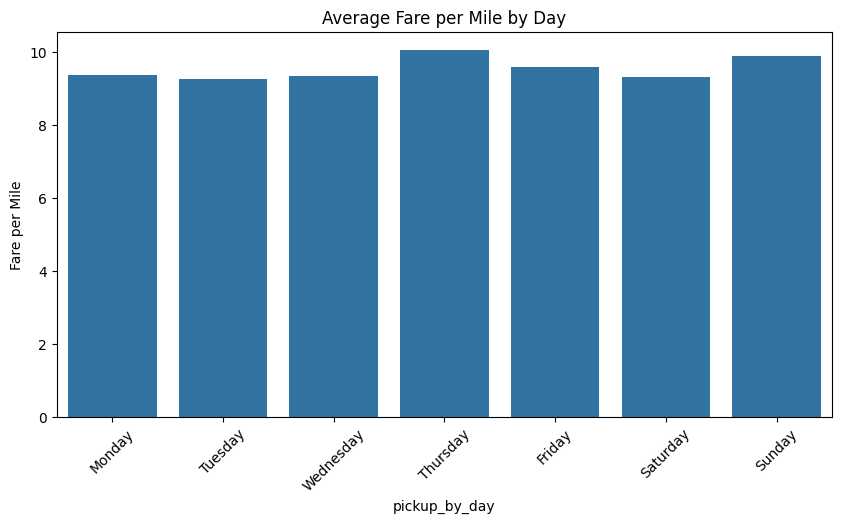

In [127]:
# Bar Plot by different days
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_per_mile_day, x='pickup_by_day', y='avg_fare_per_mile')
plt.title('Average Fare per Mile by Day')
plt.ylabel('Fare per Mile')
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

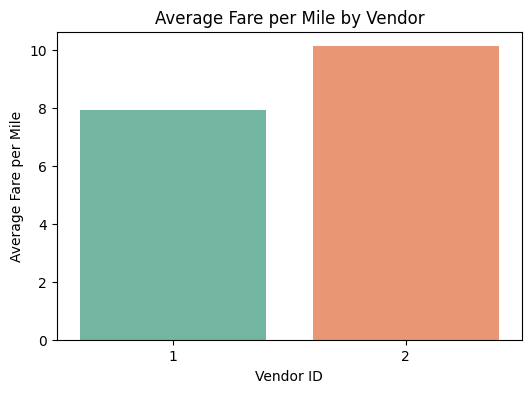

In [128]:
# Compare fare per mile for different vendors
vendor_fare = df_cleaned_data.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')

#Visual Representation using bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=vendor_fare, x='VendorID', y='avg_fare_per_mile', palette='Set2')
plt.title('Average Fare per Mile by Vendor')
plt.ylabel('Average Fare per Mile')
plt.xlabel('Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [129]:
# Defining distance tiers
#Defining a function to classify the tier
def distance_tier(miles):
    if miles <= 2:
        return '0-2 miles'
    elif 2 < miles <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'


In [130]:
# Categorize trips into distance-based tiers using a function 'distance_tier' mentioned above
# Then calculate the average fare per mile for each vendor within each distance tier
# This helps compare fare pricing patterns across vendors for short, medium, and long trips

df_cleaned_data['distance_tier'] = df_cleaned_data['trip_distance'].apply(distance_tier)
tiered_fare = df_cleaned_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')
tiered_fare

VendorID distance_tier  avg_fare_per_mile
0         1     0-2 miles           9.496530
1         1     2-5 miles           6.370289
2         1      5+ miles           4.471722
3         2     0-2 miles          13.752712
4         2     2-5 miles           6.544568
5         2      5+ miles           4.509477

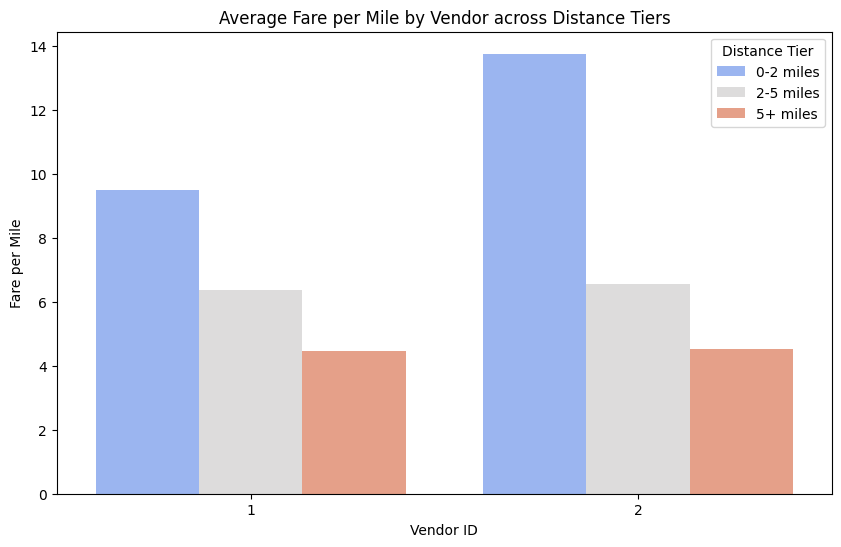

In [131]:
#plotting the fare per mile by vendor across distance tiers

plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='VendorID', y='avg_fare_per_mile', hue='distance_tier',palette='coolwarm')
plt.title('Average Fare per Mile by Vendor across Distance Tiers')
plt.ylabel('Fare per Mile')
plt.xlabel('Vendor ID')
plt.legend(title='Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [132]:
# Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate the tip percentage for each trip
# Formula: (tip_amount ÷ fare_amount) × 100
# This helps understand the tipping behavior with respect to the fare value

df_cleaned_data['tip_percent'] = (df_cleaned_data['tip_amount'] / df_cleaned_data['fare_amount']) * 100

#Average tip percentage for each passenger count
tip_by_passenger = df_cleaned_data.groupby('passenger_count')['tip_percent'].mean().reset_index(name='avg_tip_percent')

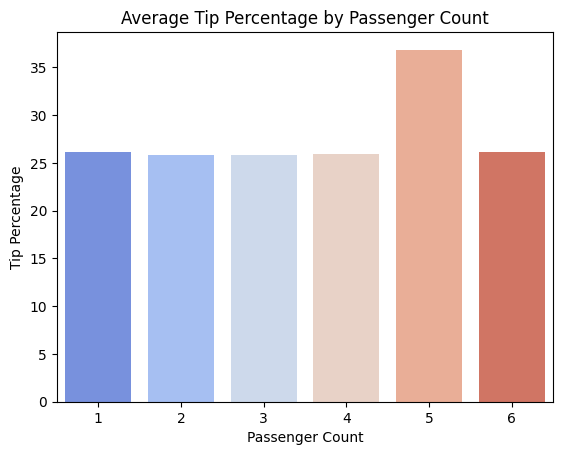

In [133]:
#Visualizing the average tip percentage for each passenger count

sns.barplot(data=tip_by_passenger, x='passenger_count', y='avg_tip_percent', palette='coolwarm')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage')
plt.xlabel('Passenger Count')
plt.show()

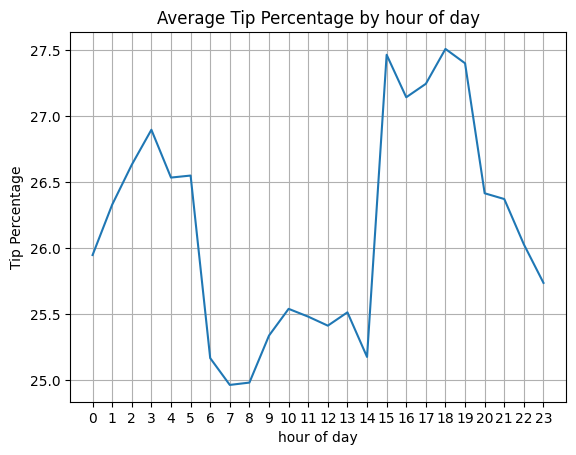

In [134]:
#By Tip percent by Hour of Day
tip_by_hour_of_day = df_cleaned_data.groupby('pickup_hour')['tip_percent'].mean().reset_index(name='avg_tip_percent')

#Visual Representation using line plot
sns.lineplot(data=tip_by_hour_of_day, x='pickup_hour', y='avg_tip_percent', markers='o')
plt.title('Average Tip Percentage by hour of day')
plt.ylabel('Tip Percentage')
plt.xlabel('hour of day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

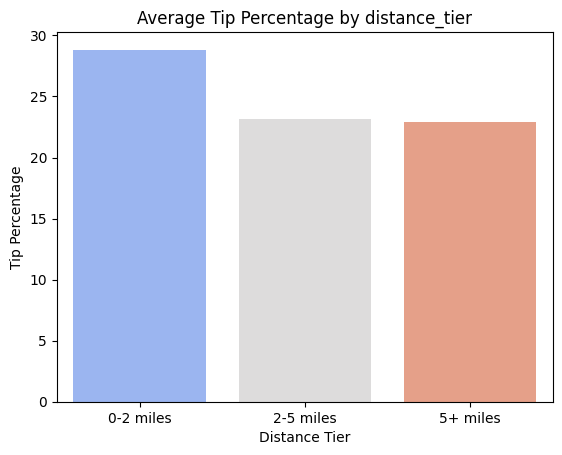

In [135]:
#By Tip percent with distance tier 
tip_by_distance_tier = df_cleaned_data.groupby('distance_tier')['tip_percent'].mean().reset_index(name='avg_tip_percent')

#Visual Representation using bar chart
sns.barplot(data=tip_by_distance_tier, x='distance_tier', y='avg_tip_percent', palette='coolwarm')
plt.title('Average Tip Percentage by distance_tier')
plt.ylabel('Tip Percentage')
plt.xlabel('Distance Tier')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [136]:
# See how passenger count varies across hours and days
passenger_trends = df_cleaned_data.groupby(['pickup_by_day', 'pickup_hour'])['passenger_count'].mean().reset_index()
passenger_trends

pickup_by_day  pickup_hour  passenger_count
0          Friday            0         1.376139
1          Friday            1         1.371477
2          Friday            2         1.391395
3          Friday            3         1.371508
4          Friday            4         1.414804
..            ...          ...              ...
163     Wednesday           19         1.316572
164     Wednesday           20         1.325398
165     Wednesday           21         1.349406
166     Wednesday           22         1.371205
167     Wednesday           23         1.348563

[168 rows x 3 columns]

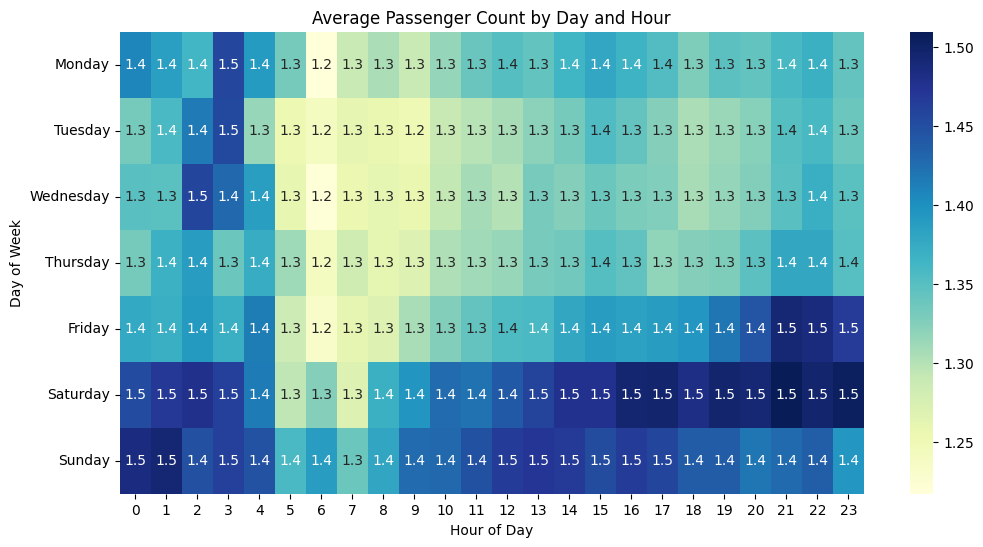

In [137]:
# Pivot the data to show passenger counts for each hour of the day across all weekdays.
# Rows represent days of the week, columns represent each pickup hour (0–23).
# The reindex ensures the days appear in logical order from Monday to Sunday.
passenger_trends_pivot = passenger_trends.pivot(index='pickup_by_day', columns='pickup_hour', values='passenger_count').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#Visual Representation using heat map
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_trends_pivot, cmap='YlGnBu', annot=True)
plt.title('Average Passenger Count by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

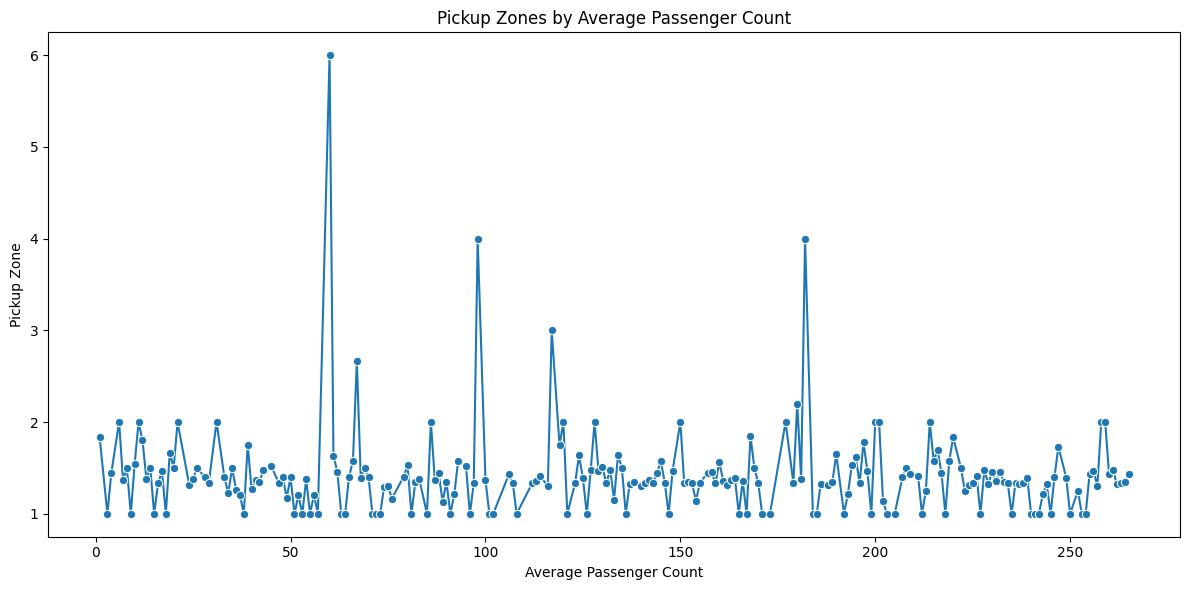

In [138]:
# How does passenger count vary across zones
zone_passenger_count = df_cleaned_data.groupby('PULocationID')['passenger_count'].mean().reset_index()

#Visual Representation using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=zone_passenger_count, x='PULocationID', y='passenger_count', marker='o')
plt.title('Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [139]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count_by_zone = df_cleaned_data.groupby('PULocationID')['passenger_count'].mean().reset_index()
df_zones_count = df_zones.merge(avg_passenger_count_by_zone,on='PULocationID', how='left')
df_zones_count['passenger_count'].fillna(0,inplace=True)


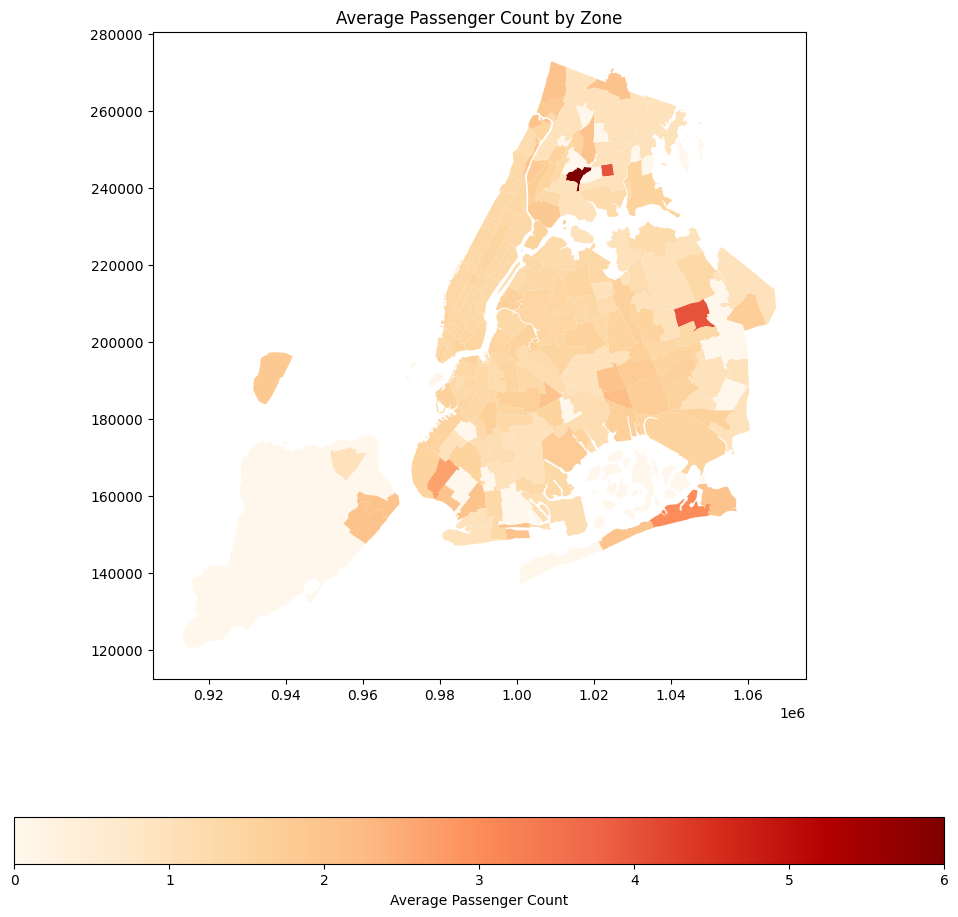

In [140]:
# Plot a choropleth map to visualize the average passenger count per zone.
# 'OrRd' colormap is used to show intensity (light to dark orange-red) based on passenger volume.
# A horizontal legend is added for reference. The map is sized for better readability.

df_zones_count.plot(column='passenger_count', cmap='OrRd', legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Average Passenger Count by Zone')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [141]:
df_cleaned_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_hour', 'Airport_Total_Fee',
       'pickup_by_day', 'pickup_by_month', 'quarter', 'trip_duration',
       'payment_labels', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry', 'avg_speed_mph', 'day_type', 'dropoff_hour',
       'fare_per_mile', 'distance_tier', 'tip_percent'],
      dtype='object')

In [142]:
# How often is each surcharge applied?
# List of surcharge columns
surcharges = ['extra', 'Airport_Total_Fee','improvement_surcharge','congestion_surcharge','mta_tax']
for col in surcharges:
    percent = (df_cleaned_data[col] > 0).mean() * 100
    print(f"{col}: {percent:.2f}% of trips")

extra: 63.46% of trips
Airport_Total_Fee: 8.22% of trips
improvement_surcharge: 100.00% of trips
congestion_surcharge: 94.88% of trips
mta_tax: 99.42% of trips


In [143]:
# Analyze the pickup zones where surcharges are applied more frequently
df_cleaned_data['has_surcharge'] = ((df_cleaned_data['extra'] > 0) | (df_cleaned_data['improvement_surcharge'] > 0) | (df_cleaned_data['congestion_surcharge'] > 0) | (df_cleaned_data['Airport_Total_Fee'] > 0 ))

In [144]:
#Analysis on the zones where surcharges are applied 
zone_surcharge_freq = df_cleaned_data.groupby(['zone','borough'])['has_surcharge'].sum().reset_index(name='Surcharge_Count').sort_values(by='Surcharge_Count', ascending=False).head(10)
zone_surcharge_freq

zone    borough  Surcharge_Count
195         Upper East Side South  Manhattan            70052
130                Midtown Center  Manhattan            67614
101                   JFK Airport     Queens            63825
194         Upper East Side North  Manhattan            63452
131                  Midtown East  Manhattan            52352
110             LaGuardia Airport     Queens            51505
113           Lincoln Square East  Manhattan            48850
150  Penn Station/Madison Sq West  Manhattan            48569
188     Times Sq/Theatre District  Manhattan            44278
139                   Murray Hill  Manhattan            42824

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Temporal Demand Patterns:

<B>Insights:</B>
• Peak hours: 6–9 AM and 5–7 PM (weekday commute)<br>
• Lowest demand: 12 AM–5 AM (except weekends)<br>
• High trip concentration in Midtown, Upper East Side, and transport hubs<br>
• Zones like South Ozone Park, Queensbridge, and Newark Airport show low activity<br>

<B>Recommendations:</B><br>
• Morning (6–9 AM): Prioritize dispatch around residential areas<br>
• Evening (5–7 PM): Focus dispatch around commercial/tourist hubs like Penn Station, Times Square, Midtown Center<br>
• Limit active dispatches to low-demand zones like South Ozone Park and Queensbridge unless a ride is confirmed<br>
• Use trip duration vs. fare data (3.1.7) to identify congested routes with low profitability<br>
• Larger vehicles can be deployed during peak hours to accommodate more passengers.<br>

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

<B>Insights:</B>

• Highest pickup hours: 6 PM, 8 AM, and 12 PM  
• Wednesday & Thursday are strongest. Weekends have flat but steady demand.  
• Monthly highs: May, October, and November. August is weakest  
• Top zones by trip volume: Upper East Side South, Midtown, JFK, LaGuardia, Times Square.  

<B>Strategic Deployment Plan</B>

• Weekday Mornings (6–10 AM):<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Focus on residential dispatch  
   &nbsp;&nbsp;&nbsp;&nbsp;- Target solo commuters (average passenger count ~ 1.2)  

• Weekday Evenings (5–8 PM):<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Deploy in places like Times Square, Midtown, Penn Station, LaGuardia — focus on high tip times.  

• Weekends:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Optimize for late-night deployment (12 AM–3 AM) where weekend demand spikes  
    &nbsp;&nbsp;&nbsp;&nbsp;- Deploy more group-friendly vehicles in nightlife zones like Times Square, East Village, West Village  

• By Month:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Boost fleet in October, May, and November  
    &nbsp;&nbsp;&nbsp;&nbsp;- In August/February, scale down to reduce operating cost


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

<B>Insights</B><br>
•	Vendor 2 charges more per mile, especially for short trips<br>
•	Solo rides have higher fare per mile than shared rides<br>
•	Fare per mile is highest in early AM (3–5 AM) and on Thursdays<br>
•	Airport trips (8.22%) yield high value despite fewer trips<br>
•	Tip % is highest during 3–7 PM and for groups of 5<br>

<B>Pricing Strategy Recommendations:</B><br>

•	Introduce Dynamic Pricing Tiers – <br>
&nbsp;&nbsp;&nbsp;&nbsp;-Time-based fares: Slight increase during early morning (3–5 AM) and rush hours (5–7 PM) when fare per mile is naturally higher<br>
&nbsp;&nbsp;&nbsp;&nbsp;-Thursday Surge: Capitalize on peak profitability by offering premium tier rides can use business class cabs<br>
•	Distance-based Tiers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;-Apply premium pricing on short-distance trips in high-demand zones (like Midtown), like Vendor 2.<br>
&nbsp;&nbsp;&nbsp;&nbsp;-Offer discounted group pricing to encourage more shared rides during weekends and off-peak hours<br>
•	Strategically apply congestion-based surcharges in Midtown and Penn Station during peak hours.<br>
•	Offer discounts in low-demand months (August, February) or zones with low pickup-to-drop ratio. <br>

<B>Additional Points:</B><br>

•	Introduce driver bonus schemes for consistent service excellence, encouraging better customer interaction and higher tips.<br>
•	Give timely break off during off time and make ready during peak hours<br>
•	Implement 1.2x pricing during bad weather (rain, snow, extreme heat/cold) to compensate drivers and maintain availability<br>
